This Jupyter Notebook took as reference the article : https://towardsdatascience.com/convolutional-neural-networks-explained-how-to-successfully-classify-images-in-python-df829d4ba761

# Index   

1 -> check initial images and amend formats

2 -> wep scrapping of new images for each sport

3 -> validate new images: content, size

4 -> crop training images to 3 squared images

5 -> generation of arrays with images at the proper size and lists with labelling (testing/validation array included) 

6 ->  Create different Convolutional Neural Network/CNN: the simple one, with augmented images, adding an initial pertained model. 

7- > Training and validation 
save models

8 -> Prediction with the best CNN

## Importing libraries

In [1]:
# Tensorflow / Keras
import tensorflow as tf # used to access argmax function
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D # for adding Concolutional and densely-connected NN layers.
from keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.applications import vgg16, inception_v3, resnet50, mobilenet #import pretrained CNN
from tensorflow.keras import applications 

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import pathlib

# Sklearn
import sklearn # for model evaluation
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import OrdinalEncoder # for encoding labels

# Visualization
import matplotlib.image as mpimg
import cv2 # for ingesting images
print('OpenCV: %s' % cv2.__version__) # print version
import matplotlib 
import matplotlib.pyplot as plt # for showing images
print('matplotlib: %s' % matplotlib.__version__) # print version
from PIL import Image
import random

# Other utilities
import sys
import os
from platform import python_version
import time
import datetime

print('python version: %s' % python_version()) # print version


Tensorflow/Keras: 2.9.0
pandas: 1.4.2
numpy: 1.22.3
sklearn: 1.1.1
OpenCV: 4.6.0
matplotlib: 3.5.2
python version: 3.9.13


## Load, Transform and Explore (LTE) data (Images & Labels)

In [2]:
# Assign main directory to a variable
main_dir=os.path.dirname(sys.path[0])
train_images_dir = main_dir +'\\imag_recognition\\train'
test_images_dir = main_dir +'\\imag_recognition\\test'

In [29]:
# Folder structure for this project:
    
# C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\
# |--Image_sports_classification (folder)
# |--|--Imágenes-data-science-ii (folder)
# |--|--|--train (folder)
# |--|--|--|--baseball (folder)
# |--|--|--|--|--image_1.jpg
# |--|--|--|--|--image_2.jpg
# |--|--|--|--|--...
# |--|--|--|--cricket (folder)
# |--|--|--|--|--image_1.jpg
# |--|--|--|--|--image_2.jpg
# |--|--|--|--football (folder)
# |--|--|--|--|--image_1.jpg
# |--|--|--|--|--image_2.jpg
# |--|--|--|--|--...
# |--|--|--test (folder)
# |--|--|--|--image_1.jpg
# |--|--|--|--image_2.jpg
# |--|--|--output (folder) 

In [30]:
def non_jpg_files(folder_path):
    '''returns a list with the names of files that are non .jpg images.
            INPUT: path to be checked
            OUTPUT: list of images that are not .jpg'''
    list_no_jpg=[]
    new_list_files= os.listdir(folder_path)
    for i in range(0, len(new_list_files)):
        if new_list_files[i].split('.')[1] !='jpg':
            list_no_jpg.append (new_list_files[i])
    return list_no_jpg

def jpg_files(folder_path):
    '''returns a list with the names of files that are .jpg images.
            INPUT: path to be checked
            OUTPUT: list of images that are not .jpg'''
    list_jpg=[]
    new_list_files= os.listdir(folder_path)
    for i in range(0, len(new_list_files)):
        if new_list_files[i].split('.')[1] =='jpg':
            list_jpg.append (new_list_files[i])
    return list_jpg

In [31]:
def check_format_images(path):
    non_jpg_images = non_jpg_files (path)
    jpg_images= jpg_files (path)
    print (f'In the folder \n {path} \n there are {len(os.listdir(path))} files: {len(jpg_images)} .jpg images and {len(non_jpg_images)} non jpg images. \n')

In [32]:
for i in os.listdir(train_images_dir):
       path = (os.path.join(train_images_dir, i))
       check_format_images(path)


In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\baseball 
 there are 59 files: 59 .jpg images and 0 non jpg images. 

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\cricket 
 there are 72 files: 72 .jpg images and 0 non jpg images. 

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\football 
 there are 51 files: 51 .jpg images and 0 non jpg images. 



In [33]:
check_format_images(test_images_dir)

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\test 
 there are 41 files: 35 .jpg images and 6 non jpg images. 



An initial analysis of images showed that there are images of different formats in the train and test folders. To proper funtion, let's change the format of images to the same format (jpg) and also check if all images can be accessed by Python.  To do so, diferent functions are created:

In [34]:
def to_jpg_converter(folder_path, image_name):
    '''convert images to the jpg format (remove initial format!!)
        INPUT:  path where the image is and the name of the image 
        OUTPUT: save image in the same directory and delete image with the original format''' 
    path_file = os.path.join(folder_path, image_name) 
    try: 
        im = Image.open(path_file)
        new_name= image_name.split('.')[0] +'.jpg'
        image_new_format = os.path.join(folder_path, new_name)
        im.save(image_new_format)
        im.close()
    except: 
        print (f'image {image_name} could not be transformed' )
    remove_file (folder_path, image_name) 

In [35]:
def remove_file (folder_path, name_file):
    ''' remove file if exists. Else, it shows a warning message
            INPUT: path where the file is and name of the file with extension (.doc, .rmd, .jpg, ....)
            OUTPUT: warning message in case any error on name or path or deleting the file if all is fine
            
            path ha d'estar amb el format correcte!!
        '''
    # Path
    path_file = os.path.join(folder_path, name_file) 
    print (path_file)
    
    # Remove the file
    if os.path.exists(path_file):
        os.remove(path_file)
        print (name_file + ' deleted!!')
    else:
        print ('No file found with such name and route!')

In [36]:
# converting non jpg images to jpg 
for i in ['baseball', 'cricket', 'football']: 
       path = (os.path.join(train_images_dir, i))
       non_jpg_images = non_jpg_files (path)
       for j in non_jpg_images:
                     to_jpg_converter(path, j)            


In [37]:
# Check again the file format of images
for i in os.listdir(train_images_dir):
       path = (os.path.join(train_images_dir, i))
       check_format_images(path)

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\baseball 
 there are 59 files: 59 .jpg images and 0 non jpg images. 

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\cricket 
 there are 72 files: 72 .jpg images and 0 non jpg images. 

In the folder 
 c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\football 
 there are 51 files: 51 .jpg images and 0 non jpg images. 



In [38]:
# List image categories we are interested in the training set
labels_set = set(os.listdir(train_images_dir))
labels_set

{'baseball', 'cricket', 'football'}

In [39]:
# Create two lists to contain image paths and image labels
ImagePaths=[]
ListLabels=[]
for label in labels_set:
    for image in list(os.listdir(train_images_dir+"/"+label)):
        ImagePaths=ImagePaths+ [train_images_dir+"/"+label+"/"+image]
        ListLabels=ListLabels+[label]

In [40]:
def resize_image (img_path, size):
    ''' Function to resize an image ignoring original aspect ratio:
            INPUT: image full path and new size (n) to  be applied as squared n x n dimensions
            OUTPUT: image of n x n dimesions or message of error if it can not open the image'''
    
    if cv2.haveImageReader(img_path): #check if opencv can read the image
        image = cv2.imread(img_path)
        image = cv2.resize(image, (size, size))
        return image
    else:
        print ('It was not able to open the image. Possible causes: incorrect route, synthaxis, missing permissions,...')


In [41]:
def check_shape_img(img_path):
    if cv2.haveImageReader(img_path): #check if opencv can read the image
        image = cv2.imread(img_path)
        rows, cols, _ = image.shape
        if rows > 2*cols or cols> 2*rows:
            print (path,'\n Image ratio far from squared!! ', )
        return rows, cols
    else:
        print (f'It was not able to open the image. \n {img_path} \n Possible causes: incorrect route, synthaxis, missing permissions,...')

In [42]:
 for image in list(os.listdir(test_images_dir)):
              path = (os.path.join(test_images_dir, image))
              check_shape_img(path)


c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\test\f2eeea85-9966-4f34-9769-7ef126490e3c.jpg 
 Image ratio far from squared!! 


In [43]:
for i in os.listdir(train_images_dir):
       for image in list(os.listdir(train_images_dir+"\\"+i)):
              path = (os.path.join(train_images_dir, i,image))
              check_shape_img(path)


c:\Users\march\000 Treball Ju`yter 000\Hackathons\imag_recognition\train\baseball\a67bb61e-95b8-49f1-bbc9-900897a50424.jpg 
 Image ratio far from squared!! 


In [44]:
image_trial = cv2.imread('c:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\imag_recognition\\train\\baseball\\a67bb61e-95b8-49f1-bbc9-900897a50424.jpg')
image_trial.shape

(187, 400, 3)

In [45]:
image_trial = cv2.imread('c:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\imag_recognition\\test\\f2eeea85-9966-4f34-9769-7ef126490e3c.jpg') 
image_trial.shape

(199, 400, 3)

In [46]:
def crop_image_to_squares(img_path):
    '''Function to crop images to squared images without changing aspect ratio.
            INPUT: image paht
            OUTPUT: error message if it's not possible to open the image or 3 squared imageds that joined include the full image.
            
            *: Previously should be checked that diference between lenght and with are not too big: width/height < (1/3) or width/height >3'''
    if cv2.haveImageReader(img_path): #check if opencv can read the image
        image = cv2.imread(img_path)
        rows, cols, _ = image.shape
        if rows > cols:
            image_cut1 = image [0 : cols , 0 : cols,:]
            image_cut2 = image [(rows-cols) : rows , 0 : cols,:] 
            image_cut3 = image [int((rows-cols)/2) : int((rows+cols)/2) , 0 : cols,:] 

        elif cols > rows:
            image_cut1 = image [0 : rows , 0 : rows,:]
            image_cut2 = image [0 : rows, (cols-rows) : cols,:]
            image_cut3 = image [0 : rows , int((cols-rows)/2) : int((cols+rows)/2),:] 
        else:
            image_cut1 = image_cut2 = image_cut3 = image


        return image_cut1, image_cut2, image_cut3
    else:
        print ('It was not able to open the image. Possible causes: incorrect route, synthaxis, missing permissions,...')

Let's check how it works:

In [47]:
dir_image = train_images_dir+"\\baseball\\0e564fd2-9c18-4010-8a62-445bd899faf0.jpg"
img_sub1, img_sub2, img_sub3 = crop_image_to_squares(dir_image)

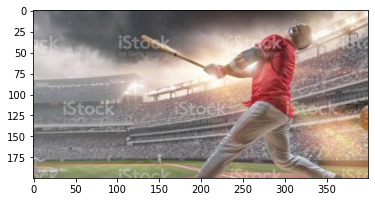

In [48]:
image_1= mpimg.imread(train_images_dir+"\\baseball\\0e564fd2-9c18-4010-8a62-445bd899faf0.jpg")
plt.imshow(image_1)


Initial image 



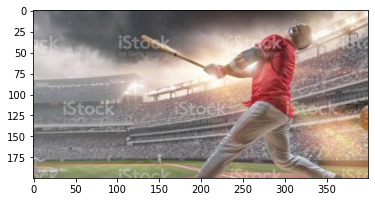

Cropped images


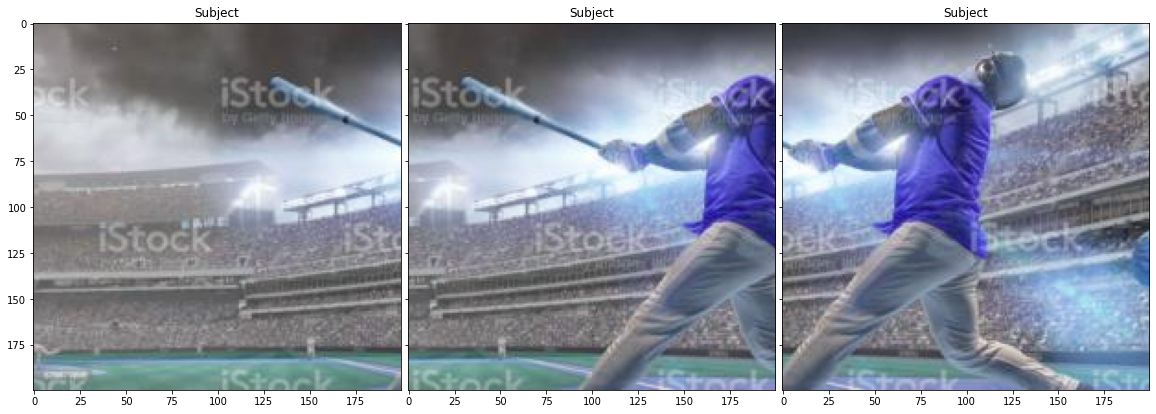

In [49]:
print ('Initial image \n')

image_1= mpimg.imread(train_images_dir+"\\baseball\\0e564fd2-9c18-4010-8a62-445bd899faf0.jpg")
plt.imshow(image_1)
plt.show()

print ('Cropped images')



from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(20., 80.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 3),  # creates 1x3 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [img_sub1, img_sub3, img_sub2]):
    # Iterating over the grid returns the Axes.    
    ax.set_title('Subject')
    ax.imshow(im)

plt.show()


## Array Generation

In [50]:
# Generate an array of images resized to be 224x224 pixels, ignoring original aspect ratio
data_224=[]
for img in ImagePaths:
    image = resize_image(img, 224)
    data_224.append(image)
    
# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_224 = np.array(data_224, dtype="float") / 255.0

# Show data shape
print("Shape of whole data: ", data_224.shape)

Shape of whole data:  (182, 224, 224, 3)


In [51]:
      
# Generate an array of images  resized to be 128x128 pixels, ignoring original aspect ratio

data_128=[]
for img in ImagePaths:
    image = resize_image(img, 128)
    data_128.append(image)
    
# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_128 = np.array(data_128, dtype="float") / 255.0

# Show data shape
print("Shape of whole data: ", data_128.shape)


Shape of whole data:  (182, 128, 128, 3)


In [52]:
# Convert Labels list to numpy array
LabelsArray=np.array(ListLabels)

# Encode labels 
enc = OrdinalEncoder()
y=enc.fit_transform(LabelsArray.reshape(-1,1))


In [53]:
# Create two lists to contain image paths and image labels from the testing images
ImagePaths2=[]
ListLabels2=[]
for label in labels_set:
    img_dir = 'C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\imag_recognition\\test2'+'\\'+label
    for image in list(os.listdir(img_dir)):
        ImagePaths2=ImagePaths2+ [img_dir+"\\"+image]
        ListLabels2=ListLabels2+[label]

In [54]:
# Generate an array of images from test/validation resized to be 224x224 pixels, ignoring original aspect ratio
data_t_224=[]
for img in ImagePaths2:
    image = resize_image(img, 224)
    data_t_224.append(image)
    
# Convert image data to numpy array and standardize values (divide by 255 since RGB values ranges from 0 to 255)
data_t_224 = np.array(data_t_224, dtype="float") / 255.0

# Convert Labels list to numpy array
LabelsArray2=np.array(ListLabels2)

# Encode labels 
enc = OrdinalEncoder()
y_test2=enc.fit_transform(LabelsArray2.reshape(-1,1))



In [55]:
np.unique(y)

array([0., 1., 2.])

In [56]:
# ---- Create training and testing samples ---
X_train, X_test, y_train, y_test = train_test_split(data_224, y, test_size=0.2, random_state=0)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

# Print shapes
# Note, model input must have a four-dimensional shape [samples, rows, columns, channels]
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (145, 224, 224, 3)
Shape of y_train:  (145, 1)
Shape of X_test:  (37, 224, 224, 3)
Shape of y_test:  (37, 1)


In [57]:
# ---- Create Alternative training and testing samples: use test samples as validation/test ---
X_train2 = data_224
y_train2 = y
X_test2 =  data_t_224

 

y_train2=y_train2.reshape(-1,1)
y_test2=y_test2.reshape(-1,1)

# Print shapes
# Note, model input must have a four-dimensional shape [samples, rows, columns, channels]
print("Shape of X_train2: ", X_train2.shape)
print("Shape of y_train2: ", y_train2.shape)
print("Shape of X_test2: ", X_test2.shape)
print("Shape of y_test2: ", y_test2.shape)

Shape of X_train2:  (182, 224, 224, 3)
Shape of y_train2:  (182, 1)
Shape of X_test2:  (41, 224, 224, 3)
Shape of y_test2:  (41, 1)


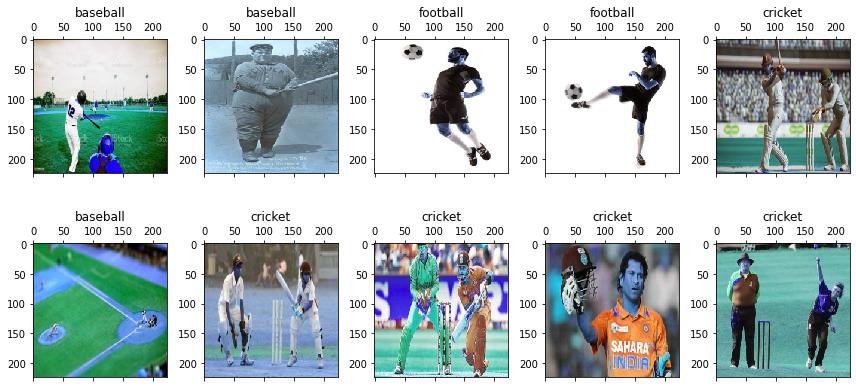

In [58]:
# Display images of 10 sports in the training set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
for i in range(0,2):
    for j in range(0,5):
        n= random.randint(0,X_train2.shape[0]-1) #eleccion imagen aleatoria
        axs[i,j].matshow(X_train2[n])
        axs[i,j].set(title=enc.inverse_transform(y_train2)[n][0])
plt.show() 

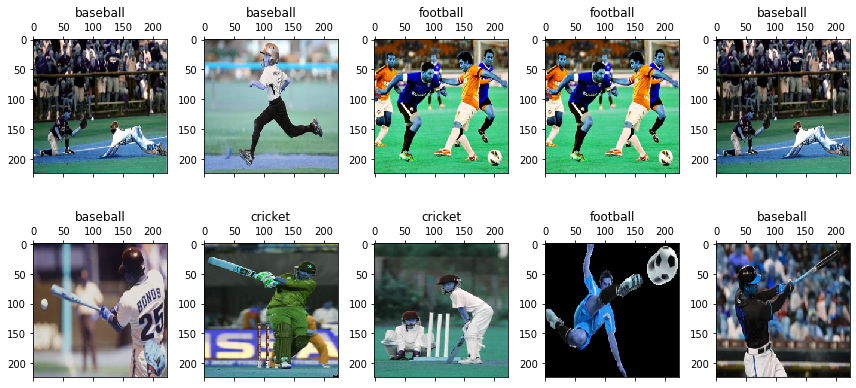

In [59]:
# Display images of 10 sports in the testing/validation set and their true labels
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
for i in range(0,2):
    for j in range(0,5):
        n= random.randint(0,X_test2.shape[0]-1) #eleccion imagen aleatoria
        axs[i,j].matshow(X_test2[n])
        axs[i,j].set(title=enc.inverse_transform(y_test2)[n][0])
        #n=n+1
plt.show() 

# Building the neuronal network

## Commom for all models

In [92]:
#Callbacks structure for all tested models 
class ASK(keras.callbacks.Callback):
    def __init__ (self, model, epochs,  ask_epoch): # initialization of the callback
        super(ASK, self).__init__()
        self.model=model               
        self.ask_epoch=ask_epoch
        self.epochs=epochs
        self.ask=True # if True query the user on a specified epoch
        
    def on_train_begin(self, logs=None): # this runs on the beginning of training
        if self.ask_epoch == 0: 
            print('you set ask_epoch = 0, ask_epoch will be set to 1', flush=True)
            self.ask_epoch=1
        if self.ask_epoch >= self.epochs: # you are running for epochs but ask_epoch>epochs
            print('ask_epoch >= epochs, will train for ', epochs, ' epochs', flush=True)
            self.ask=False # do not query the user
        if self.epochs == 1:
            self.ask=False # running only for 1 epoch so do not query user
        else:
            print('Training will proceed until epoch', ask_epoch,' then you will be asked to') 
            print(' enter H to halt training or enter an integer for how many more epochs to run then be asked again')  
        self.start_time= time.time() # set the time at which training started
        
    def on_train_end(self, logs=None):   # runs at the end of training     
        tr_duration=time.time() - self.start_time   # determine how long the training cycle lasted         
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print (msg, flush=True) # print out training duration time
        
    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        if self.ask: # are the conditions right to query the user?
            if epoch + 1 ==self.ask_epoch: # is this epoch the one for quering the user?
                print('\n Enter H to end training or  an integer for the number of additional epochs to run then ask again')
                ans=input()
                
                if ans == 'H' or ans =='h' or ans == '0': # quit training for these conditions
                    print ('you entered ', ans, ' Training halted on epoch ', epoch+1, ' due to user input\n', flush=True)
                    self.model.stop_training = True # halt training
                else: # user wants to continue training
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print('\nYou specified maximum epochs of as ', self.epochs, ' cannot train for ', self.ask_epoch, flush =True)
                    else:
                        print ('you entered ', ans, ' Training will continue to epoch ', self.ask_epoch, flush=True)




In [93]:
# Instantiate custom callback and create 2 callbacks to control learning rate and early stop

epochs=40
ask_epoch=10
INIT_LR = 1e-3 #Initial Learning Rate
EPOCHS = 25 #Number of epochs in training
BS = 10 #Training Batch Size


In [ ]:

ask=ASK(model, epochs,  ask_epoch) #change name of model to a proper funtion
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2,verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1,restore_best_weights=True)
callbacks=[rlronp, estop, ask]

## 1s trail 

In [29]:
##### Step 1 - Specify the structure of a Neural Network
#--- Define a Model
model = Sequential(name="DCN-Model") # Model


In [ ]:


#--- Input Layer 
# Specify input shape [rows, columns, channels]
model.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs


#--- First Set of Convolution, Max Pooling and Droput Layers (all parameters shown)
model.add(Conv2D(filters=32, # Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
                 kernel_size=(3,3), # An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
                 strides=(1,1), # Default=(1,1), An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.
                 padding='valid', # Default='valid', "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.
                 data_format=None, # Default=None, A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch_size, height, width, channels) while channels_first corresponds to inputs with shape (batch_size, channels,height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be channels_last.
                 dilation_rate=(1, 1), # Default=(1, 1), an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions. Currently, specifying any dilation_rate value != 1 is incompatible with specifying any stride value != 1.
                 groups=1, # Default=1, A positive integer specifying the number of groups in which the input is split along the channel axis. Each group is convolved separately with filters / groups filters. The output is the concatenation of all the groups results along the channel axis. Input channels and filters must both be divisible by groups.
                 activation='relu', # Default=None, Activation function to use. If you don't specify anything, no activation is applied (see keras.activations).
                 use_bias=True, # Default=True. 
                 kernel_initializer='glorot_uniform', # Default='glorot_uniform', Initializer for the kernel weights matrix (see keras.initializers).
                 bias_initializer='zeros', # Default='zeros', Initializer for the bias vector (see keras.initializers).
                 kernel_regularizer=None, # Default=None, Regularizer function applied to the kernel weights matrix (see keras.regularizers).
                 bias_regularizer=None, # Default=None, Regularizer function applied to the bias vector (see keras.regularizers).
                 activity_regularizer=None, # Default=None, Regularizer function applied to the output of the layer (its "activation") (see keras.regularizers).
                 kernel_constraint=None, # Default=None, Constraint function applied to the kernel matrix (see keras.constraints).
                 bias_constraint=None, # Default=None, Constraint function applied to the bias vector (see keras.constraints).
                 name='2D-Convolutional-Layer-1')
         ) # Convolutional Layer, relu activation used

model.add(MaxPool2D(pool_size=(2,2), # Default=(2,2), integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.
                    strides=(2,2), # Default=None, Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will default to pool_size.
                    padding='valid', # Default='valid', One of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
                    data_format=None, # Default=None, A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape (batch, height, width, channels) while channels_first corresponds to inputs with shape (batch, channels, height, width). 
                    name='2D-MaxPool-Layer-1')
         ) # Max Pooling Layer,

model.add(Dropout(0.2, name='Dropout-Layer-1')) # Dropout Layer


#--- Second Set of Convolution, Max Pooling and Droput Layers 
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', name='2D-Convolutional-Layer-2')) # Convolutional Layer
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid', name='2D-MaxPool-Layer-2')) # Second Max Pooling Layer,
model.add(Dropout(0.2, name='Dropout-Layer-2')) # Dropout Layer


#--- Third Set of Convolution, Max Pooling and Droput Layers
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', name='2D-Convolutional-Layer-3')) # Convolutional Layer
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same', name='2D-MaxPool-Layer-3')) # Second Max Pooling Layer,
model.add(Dropout(0.2, name='Dropout-Layer-3')) # Dropout Layer


#--- Feed-Forward Densely Connected Layer and Output Layer (note, flattening is required to convert from 2D to 1D shape)
model.add(Flatten(name='Flatten-Layer')) # Flatten the shape so we can feed it into a regular densely connected layer
model.add(Dense(16, activation='relu', name='Hidden-Layer-1', kernel_initializer='HeNormal')) # Hidden Layer, relu(x) = max(x, 0)
model.add(Dense(3, activation='softmax', name='Output-Layer')) # Output Layer, softmax(x) = exp(x) / tf.reduce_sum(exp(x))

In [33]:


##### Step 2 - Compile keras model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='SparseCategoricalCrossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['Accuracy'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )


##### Step 3 - Fit keras model on the dataset
history = model.fit(X_train, # input data
                    y_train, # target data
                    batch_size=32, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=20, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    callbacks=callbacks, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                    validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    #validation_data=(X_test2, y_test2), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                    class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                    sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                    initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                    steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                    validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                    validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                    validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                    max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                    workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                    use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                   )

Training will proceed until epoch 10  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/20
4/4 - 14s - loss: 1.8289 - Accuracy: 0.3017 - val_loss: 1.1080 - val_Accuracy: 0.2759 - lr: 0.0010 - 14s/epoch - 4s/step
Epoch 2/20
4/4 - 10s - loss: 1.1095 - Accuracy: 0.3879 - val_loss: 1.0956 - val_Accuracy: 0.4483 - lr: 0.0010 - 10s/epoch - 3s/step
Epoch 3/20
4/4 - 10s - loss: 1.0985 - Accuracy: 0.3879 - val_loss: 1.0892 - val_Accuracy: 0.4828 - lr: 0.0010 - 10s/epoch - 2s/step
Epoch 4/20
4/4 - 12s - loss: 1.0875 - Accuracy: 0.4569 - val_loss: 1.0991 - val_Accuracy: 0.1724 - lr: 0.0010 - 12s/epoch - 3s/step
Epoch 5/20

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
4/4 - 13s - loss: 1.0751 - Accuracy: 0.5431 - val_loss: 1.0892 - val_Accuracy: 0.4483 - lr: 0.0010 - 13s/epoch - 3s/step
Epoch 6/20
4/4 - 12s - loss: 1.0575 - Accuracy: 0.4741 - val_loss: 1.0682 - val_Accuracy: 0.5172 - lr

In [78]:

##### Step 3 - Fit keras model bigger dataset 
history2 = model.fit(X_train2, # input data
                    y_train2, # target data
                    batch_size=32, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                    epochs=20, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                    verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                    callbacks=callbacks, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                    validation_split=0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                    validation_data=(X_test2, y_test2), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                    shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                    class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                    sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                    initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                    steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                    validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                    validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                    validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                    max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                    workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                    use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                   )

ask_epoch >= epochs, will train for  40  epochs
Training will proceed until epoch 10  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/20
6/6 - 17s - loss: 0.9241 - Accuracy: 0.5440 - val_loss: 1.0827 - val_Accuracy: 0.4146 - lr: 1.2500e-04 - 17s/epoch - 3s/step
Epoch 2/20
6/6 - 15s - loss: 0.9266 - Accuracy: 0.5989 - val_loss: 1.0601 - val_Accuracy: 0.4634 - lr: 1.2500e-04 - 15s/epoch - 2s/step
Epoch 3/20
6/6 - 15s - loss: 0.9009 - Accuracy: 0.5659 - val_loss: 1.0938 - val_Accuracy: 0.4390 - lr: 1.2500e-04 - 15s/epoch - 2s/step
Epoch 4/20
6/6 - 15s - loss: 0.8721 - Accuracy: 0.5934 - val_loss: 1.0531 - val_Accuracy: 0.4390 - lr: 1.2500e-04 - 15s/epoch - 3s/step
Epoch 5/20
6/6 - 15s - loss: 0.8639 - Accuracy: 0.6044 - val_loss: 1.0463 - val_Accuracy: 0.4390 - lr: 1.2500e-04 - 15s/epoch - 3s/step
Epoch 6/20
6/6 - 17s - loss: 0.8435 - Accuracy: 0.6209 - val_loss: 1.0664 - val_Accuracy: 0.4146 - lr: 1.2500e

## Applying Pretrained Deep Neural Networks for Image Classification

El fa servir directament amb noves imatges https://hannibunny.github.io/mlbook/neuralnetworks/04KerasPretrainedClassifiers.html 


Implantació reds preentrenades però objectius nous:
https://hannibunny.github.io/mlbook/neuralnetworks/05KerasPretrainedCovid.html

In [94]:
vgg16 = applications.vgg16.VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))


In [95]:
inception_model = applications.inception_v3.InceptionV3(weights='imagenet', include_top=False,input_tensor=Input(shape=(224, 224, 3)))


In [96]:
resnet_model = applications.resnet50.ResNet50(weights='imagenet', include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [97]:
mobilenet_model = applications.mobilenet.MobileNet(weights='imagenet', include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [72]:
def module_generator(baseModel):
    ''' function to generate models with a trained inital base.
            INPUT: base Model
            OUTPUT: model with a pretained part, to be used with 3 outùt categories.'''
            
    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(64, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(3, activation="softmax")(headModel)
    new_model = Model(inputs=baseModel.input, outputs=headModel)
    for layer in baseModel.layers:
        layer.trainable = False
    return new_model


## VGG16 model

In [66]:
model_VGG16 = module_generator (vgg16)
model_VGG16._name = 'model_pretrained_VGG16'
model_VGG16.summary()

Model: "model_pretrained_VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 

In [43]:
# Instantiate custom callback and create 2 callbacks to control learning rate and early stop

epochs=40
ask_epoch=10
ask=ASK(model_VGG16, epochs,  ask_epoch) #change name of model to a proper funtion
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2,verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1,restore_best_weights=True)
callbacks=[rlronp, estop, ask]

In [44]:
print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model_VGG16.compile(loss='SparseCategoricalCrossentropy', optimizer=opt,metrics=["accuracy"]) 

[INFO] compiling model...


In [96]:
print("[INFO] training classifier part of the network...")
H_model_VGG16 = model_VGG16.fit(X_train2, # input data
                y_train2, # target data
                batch_size=32, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                epochs=20, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                callbacks=callbacks, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                validation_split=0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                validation_data=(X_test2, y_test2), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                validation_batch_size=None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                )

[INFO] training classifier part of the network...
Training will proceed until epoch 10  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/20
6/6 - 96s - loss: 1.2278 - accuracy: 0.3352 - val_loss: 1.1021 - val_accuracy: 0.3902 - lr: 0.0010 - 96s/epoch - 16s/step
Epoch 2/20
6/6 - 119s - loss: 1.1095 - accuracy: 0.3846 - val_loss: 1.0826 - val_accuracy: 0.3902 - lr: 0.0010 - 119s/epoch - 20s/step
Epoch 3/20
6/6 - 123s - loss: 1.0616 - accuracy: 0.4341 - val_loss: 1.0711 - val_accuracy: 0.3415 - lr: 0.0010 - 123s/epoch - 20s/step
Epoch 4/20
6/6 - 132s - loss: 1.0250 - accuracy: 0.4505 - val_loss: 1.0449 - val_accuracy: 0.3659 - lr: 0.0010 - 132s/epoch - 22s/step
Epoch 5/20
6/6 - 124s - loss: 1.0125 - accuracy: 0.5000 - val_loss: 1.0247 - val_accuracy: 0.5854 - lr: 0.0010 - 124s/epoch - 21s/step
Epoch 6/20
6/6 - 135s - loss: 0.9947 - accuracy: 0.4890 - val_loss: 1.0204 - val_accuracy: 0.4634 - lr: 0.0010 - 13

: 

: 

### VGG16 model augmenting images on training

In [ ]:
print("[INFO] training classifier part of the network...") #QWARTA

# initialize the number of epochs and batch size
EPOCHS = 15
BS = 32
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, 
                        zoom_range=0.15,
                        width_shift_range=0.2, 
                        height_shift_range=0.2, 
                        shear_range=0.15,
                        horizontal_flip=True, 
                        fill_mode="nearest")


H_model_VGG16_aug = model_VGG16.fit_generator(
    aug.flow(X_train2, 
            y_train2, 
            batch_size=BS),
    #steps_per_epoch=len(X_train2) // BS,
    #validation_data=(X_test2, y_test2),
    #validation_steps=len(X_test2) // BS,
    verbose=2,
    epochs=EPOCHS)

[INFO] training classifier part of the network...


C:\Users\march\AppData\Local\Temp\ipykernel_14488\730178940.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H_model_VGG16_aug = model_VGG16.fit_generator(


Epoch 1/15
5/5 - 325s - loss: 1.6764 - accuracy: 0.2067 - val_loss: 1.0955 - val_accuracy: 0.0000e+00 - 325s/epoch - 65s/step
Epoch 2/15
5/5 - 298s - loss: 1.1601 - accuracy: 0.2067 - val_loss: 1.0985 - val_accuracy: 0.0000e+00 - 298s/epoch - 60s/step
Epoch 3/15


: 

: 

## inception_model

In [98]:
model_inception = module_generator (inception_model)
model_inception._name = 'model_pretrained_inception'
model_inception.summary()

Model: "model_pretrained_inception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                        

In [88]:
# Instantiate custom callback and create 2 callbacks to control learning rate and early stop

epochs=40
ask_epoch=10
ask=ASK(model_inception, epochs,  ask_epoch) #change name of model to a proper funtion
rlronp=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2,verbose=1)
estop=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1,restore_best_weights=True)
callbacks=[rlronp, estop, ask]


In [89]:

print("[INFO] compiling model...")
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model_inception.compile(loss='SparseCategoricalCrossentropy', 
                        optimizer=opt,
                        metrics=["accuracy"]) 

[INFO] compiling model...


In [91]:
print("[INFO] training classifier part of the network...")
H_model_inception = model_inception.fit(X_train2, # input data
                y_train2, # target data
                batch_size=32, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                epochs=20, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                callbacks= callbacks #callbacks, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                validation_split=0.0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                validation_data=(X_test2, y_test2), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                validation_batch_size= None, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                )

SyntaxError: invalid syntax (2825965652.py, line 8)

In [87]:
H_model_inception = model_inception.fit(X_train2, # input data
                y_train2, # target data
                batch_size=32, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
                epochs=20, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
                verbose=2, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
                callbacks= callbacks #callbacks, # default=None, list of callbacks to apply during training. See tf.keras.callbacks
                validation_split=0, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
                validation_data=(X_test2, y_test2), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
                class_weight=None, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
                sample_weight=None, # default=None, Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only).
                initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
                steps_per_epoch=None, # Integer or None, default=None, Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. 
                validation_steps=None, # Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
                validation_batch_size=10, # Integer or None, default=None, Number of samples per validation batch. If unspecified, will default to batch_size.
                validation_freq=1, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
                max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
                workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
                use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
                )

SyntaxError: invalid syntax (2674683497.py, line 7)

## Resnet model

In [ ]:
model_resnet = module_generator (resnet_model) 
model_resnet._name = 'model_pretrained_resnet'
model_resnet.summary()

## MobileNet model

In [40]:
model_mobilenet = module_generator (mobilenet_model)
model_mobilenet._name = 'model_pretrained_mobilenet'
model_mobilenet.summary()

TypeError: module_generator() got an unexpected keyword argument 'input_tensor'

In [ ]:
H_model_inception_aug = model_inception.fit(
    aug.flow(X_train2, 
            y_train2, 
            batch_size=BS),
    steps_per_epoch=len(X_train2) // BS,
    validation_data=(X_test2, y_test2),
    validation_steps=len(X_test2) // BS,
    verbose=2,
    epochs=EPOCHS)


## 1a Manera (només copiada no adaptada, té f1 score in Keras)

https://medium.com/@himancodes/building-an-image-classifier-from-scratch-using-convolutional-neural-networks-c9ebcde3a53e

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

base = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
tf.keras.backend.clear_session()
    
for layer in base.layers:
    layer.trainable =  False

mobilenet_model = Sequential()
mobilenet_model.add(base)
mobilenet_model.add(GlobalAveragePooling2D())

mobilenet_model.add(Dense(256, activation='relu'))
mobilenet_model.add(Dropout(0.1))

mobilenet_model.add(Dense(256, activation='relu'))
mobilenet_model.add(Dropout(0.1))
mobilenet_model.add(Dense(3, activation='softmax')) #last layer should have as many neuron as options = 3 sports

In [ ]:
Folder structure

|--image-classification (folder)
|--|--dataset (folder)
|--|--|--train (folder)
|--|--|--|--cowbell (folder)
|--|--|--|--|--image_1.jpg
|--|--|--|--|--image_2.jpg
|--|--|--|--|--...
|--|--|--|--tulip (folder)
|--|--|--|--|--image_1.jpg
|--|--|--|--|--image_2.jpg
|--|--|--|--|--...
|--|--|--test (folder)
|--|--|--|--image_1.jpg
|--|--|--|--image_2.jpg
|--|--output (folder)
|--|--|--data.h5
|--|--|--labels.h5
|--|--global.py
|--|--train_test.py

To implement f1 macro score in Keras should be done in one of the following solutions:

In [ ]:
import tensorflow as tf
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

# https://www.kaggle.com/code/guglielmocamporese/macro-f1-score-keras

In [114]:
class MetricsCallback(keras.callbacks.Callback):
    def __init__(self):
        super(MetricsCallback, self).__init__()
    def  on_train_begin(self,logs={}):
      self.f1_macro=[]
    def on_epoch_end(self, epoch, logs=None):
      y_pred=self.model.predict(x_test).round()
      y_true=y_test
      score=f1_score(y_true, y_pred, average='macro')
      self.f1_macro.append(score)
      print(" F1 macro :",score)

metrics=MetricsCallback()

model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=batch_size, epochs=5,callbacks=[metrics])

# https://colab.research.google.com/drive/1hTf0LjO-h2l6diVkvj0gQme25clUdFt2#scrollTo=S3hxXkGocmUq
# https://androidkt.com/calculate-f1-macro-in-keras/

# multiclass f1 macro score https://towardsdatascience.com/f-beta-score-in-keras-part-ii-15f91f07c9a4


NameError: name 'x_train' is not defined

In [ ]:
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#Train the model
'''Note unlike how you are told it is BETTER to make the base model trainable from the outset
It will converge faster and have a lower validation losss'''

history=model.fit(x=train_gen, 
                     epochs=epochs, 
                     verbose=2, 
                     callbacks=callbacks,  
                     validation_data=valid_gen,
                    validation_steps=None,  
                    shuffle=False,  
                    initial_epoch=0
                    )

In [ ]:
def tr_plot(tr_data, start_epoch):
    

    
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()

In [ ]:
def predictor(test_gen, test_steps):
    '''Define a function which takes in a test generator and an integer test_steps
    and generates predictions on the test set including a confusion matrix
    and a classification report'''
    
    y_pred= []
    y_true=test_gen.labels
    classes=list(train_gen.class_indices.keys())
    class_count=len(classes)
    errors=0
    preds=model.predict(test_gen, steps=test_steps, verbose=1) # predict on the test set
    tests=len(preds)
    for i, p in enumerate(preds):
            pred_index=np.argmax(p)         
            true_index=test_gen.labels[i]  # labels are integer values
            if pred_index != true_index: # a misclassification has occurred                                           
                errors=errors + 1
            y_pred.append(pred_index)
    acc=( 1-errors/tests) * 100
    print(f'there were {errors} in {tests} tests for an accuracy of {acc:6.2f}')
    ypred=np.array(y_pred)
    ytrue=np.array(y_true)
    if class_count <=30:
        cm = confusion_matrix(ytrue, ypred )
        # plot the confusion matrix
        plt.figure(figsize=(16, 10))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count)+.5, classes, rotation=90)
        plt.yticks(np.arange(class_count)+.5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    clr = classification_report(y_true, y_pred, target_names=classes, digits= 4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    


In [ ]:
#Save the model
  
subject='bengali digits' 
acc=str(( 1-errors/tests) * 100)
index=acc.rfind('.')
acc=acc[:index + 3]
save_id= subject + '_' + str(acc) + '.h5' 
model_save_loc=os.path.join(working_dir, save_id)
model.save(model_save_loc)
print ('model was saved as ' , model_save_loc ) 

## Alexnet (Supervision)

Let's check the Alexnet CNN implementation

References:
* https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html
* https://www.kaggle.com/code/blurredmachine/alexnet-architecture-a-complete-guide/notebook
* https://machinelearningmastery.com/best-practices-for-preparing-and-augmenting-image-data-for-convolutional-neural-networks/

According to previous reference the size of images to be fitted in the model shoud be squared with a size of 224x224. Preferebly no distortion of aspect ratio should be made. According to this, images should be cropped to be squared.

### Cropping images to its central square and resizing

Initial images (already transformed to jpg format) where transformed and saved in new directoris to fulfil the next 2 requirement: 
1. Squared images  without distorsion of aspect ratio (crop images and getting its central part only)
2. Sizing to the required (224,224) pixel size.

In [87]:
for folder in  os.listdir(train_images_dir):
    image_directory = train_images_dir + '\\' + folder
    alex_dir = os.getcwd()+'\\alex_net\\train\\' + folder
    os.makedirs(alex_dir, exist_ok=True)
    
    for label in  os.listdir(image_directory):
        img_left, img_rigth, img_center = crop_image_to_squares(image_directory + '\\' + label) # generates 3 images , the third one is the one on the center
        im = Image.fromarray(img_center)
        im = im.resize((224,224))
        saving_img =  alex_dir + '\\' + label
        im.save(saving_img)

Same changes are made with the validation/test data:



In [98]:
test_images_dir2 = 'C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\imag_recognition\\test2'
for folder in  os.listdir(test_images_dir2):
    image_directory = test_images_dir2 + '\\' + folder
    alex_dir = os.getcwd()+'\\alex_net\\validation\\' + folder
    os.makedirs(alex_dir, exist_ok=True)
    
    for label in  os.listdir(image_directory):
        img_left, img_rigth, img_center = crop_image_to_squares(image_directory + '\\' + label) # generates 3 images , the third one is the one on the center
        #img_center =  img_center.reshape((224,224))
        im = Image.fromarray(img_center)
        im = im.resize((224,224))
        saving_img =  alex_dir + '\\' + label
        im.save(saving_img)

### Alexnet model generation

In [132]:
# AlexNet model
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None)) 

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None))

        self.add(Flatten())
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(4096, activation= 'relu'))
        self.add(Dense(1000, activation= 'relu'))
        self.add(Dense(num_classes, activation= 'softmax'))

        self.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [133]:
num_classes = 3
model_AlexNet = AlexNet((224, 224, 3), num_classes)

In [134]:
# training parameters
EPOCHS = 100
BATCH_SIZE = 32
image_height = 224
image_width = 224

In [142]:
#canviar???
working_directory = os.getcwd()
train_dir = "./alex_net/train"
valid_dir = "./alex_net/validation"
model_dir = "./alex_net.h5"

In [143]:
train_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train_datagen.flow_from_directory(train_dir, #proper training dir with squared images
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=1,
                                                    shuffle=True,
                                                    class_mode="categorical")

valid_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid_datagen.flow_from_directory(valid_dir, #proper squared dir with squared images
                                                    target_size=(image_height, image_width),
                                                    color_mode="rgb",
                                                    batch_size=BATCH_SIZE,
                                                    seed=7,
                                                    shuffle=True,
                                                    class_mode="categorical"
                                                    )
train_num = train_generator.samples
valid_num = valid_generator.samples

Found 182 images belonging to 3 classes.
Found 41 images belonging to 3 classes.


In [144]:
os.makedirs('./alex_net/logs', exist_ok=True)
os.makedirs('./alex_net/logs/fit' , exist_ok=True)

In [149]:
time_name = strftime("%Y_%m_%d_%H_%M", localtime())
log_dir=os.getcwd() + '\\alex_net\\logs\\fit\\'+ time_name
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


# start training
model_AlexNet.fit(train_generator,
                    epochs=EPOCHS,
                    steps_per_epoch=train_num // BATCH_SIZE,
                    validation_data=valid_generator,
                    validation_steps=valid_num // BATCH_SIZE,
                    callbacks=callbacks, #previously created for other model
                    verbose=2)
model_AlexNet.summary()

# save the whole model
model_AlexNet.save(model_dir)

Training will proceed until epoch 10  then you will be asked to
 enter H to halt training or enter an integer for how many more epochs to run then be asked again
Epoch 1/100
5/5 - 19s - loss: 100.4204 - accuracy: 0.2933 - val_loss: 1.2142 - val_accuracy: 0.2812 - lr: 0.0010 - 19s/epoch - 4s/step
Epoch 2/100
5/5 - 17s - loss: 1.2549 - accuracy: 0.3600 - val_loss: 1.1506 - val_accuracy: 0.3750 - lr: 0.0010 - 17s/epoch - 3s/step
Epoch 3/100
5/5 - 17s - loss: 1.1503 - accuracy: 0.4000 - val_loss: 1.2372 - val_accuracy: 0.3750 - lr: 0.0010 - 17s/epoch - 3s/step
Epoch 4/100
5/5 - 20s - loss: 1.1222 - accuracy: 0.4250 - val_loss: 1.0967 - val_accuracy: 0.2812 - lr: 0.0010 - 20s/epoch - 4s/step
Epoch 5/100
5/5 - 17s - loss: 1.0972 - accuracy: 0.3800 - val_loss: 1.0963 - val_accuracy: 0.4062 - lr: 0.0010 - 17s/epoch - 3s/step
Epoch 6/100
5/5 - 21s - loss: 1.0948 - accuracy: 0.4067 - val_loss: 1.1100 - val_accuracy: 0.4062 - lr: 0.0010 - 21s/epoch - 4s/step
Epoch 7/100

Epoch 7: ReduceLROnPlatea

## 2a Manera

In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
train_path = '../input/sports-classification/train'
valid_path = '../input/sports-classification/valid'
test_path = '../input/sports-classification/test'
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import  applications
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Conv1D, MaxPool2D,GlobalAveragePooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings('ignore')
import random
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import glob
import shutil
import os
import itertools
from sklearn.metrics import confusion_matrix ,classification_report
# import numpy as np 
# import pandas as pd 
import os
import pathlib
#import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
import warnings
warnings.filterwarnings('ignore')
os.environ["KMP_WARNINGS"] = "FALSE" 
from tensorflow.keras import layers
Transfer Learning
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path,target_size= (224,224),batch_size=10,shuffle=False)
Found 13572 images belonging to 100 classes.
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,target_size= (224,224),batch_size=10,shuffle=False)
Found 500 images belonging to 100 classes.
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

base = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
tf.keras.backend.clear_session()
    
for layer in base.layers:
    layer.trainable =  False

mobilenet_model = Sequential()
mobilenet_model.add(base)
mobilenet_model.add(GlobalAveragePooling2D())

mobilenet_model.add(Dense(256, activation='relu'))
mobilenet_model.add(Dropout(0.1))

mobilenet_model.add(Dense(256, activation='relu'))
mobilenet_model.add(Dropout(0.1))
mobilenet_model.add(Dense(100, activation='softmax'))
2022-02-16 09:07:50.363094: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:07:50.476936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:07:50.477632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:07:50.478711: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-16 09:07:50.479574: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:07:50.480230: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:07:50.480874: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:07:52.268808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:07:52.269632: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:07:52.270260: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-16 09:07:52.270857: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15403 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
Downloading data from https://storage.googleapis.com/tensorflow/keras-applications/mobilenet_v2/mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_224_no_top.h5
9412608/9406464 [==============================] - 0s 0us/step
9420800/9406464 [==============================] - 0s 0us/step
mobilenet_model.summary()
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               327936    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25700     
=================================================================
Total params: 2,677,412
Trainable params: 419,428
Non-trainable params: 2,257,984
_________________________________________________________________
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
results=mobilenet_model.fit(train_batches,epochs=10)  
2022-02-16 09:07:54.446711: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Epoch 1/10
2022-02-16 09:07:57.726453: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
1358/1358 [==============================] - 100s 67ms/step - loss: 3.8587 - accuracy: 0.1648
Epoch 2/10
1358/1358 [==============================] - 39s 28ms/step - loss: 1.8174 - accuracy: 0.5371
Epoch 3/10
1358/1358 [==============================] - 38s 28ms/step - loss: 1.1337 - accuracy: 0.6905
Epoch 4/10
1358/1358 [==============================] - 39s 28ms/step - loss: 0.8724 - accuracy: 0.7543
Epoch 5/10
1358/1358 [==============================] - 39s 29ms/step - loss: 0.6977 - accuracy: 0.7996
Epoch 6/10
1358/1358 [==============================] - 38s 28ms/step - loss: 0.5712 - accuracy: 0.8296
Epoch 7/10
1358/1358 [==============================] - 39s 28ms/step - loss: 0.4902 - accuracy: 0.8528
Epoch 8/10
1358/1358 [==============================] - 39s 29ms/step - loss: 0.4212 - accuracy: 0.8748
Epoch 9/10
1358/1358 [==============================] - 39s 28ms/step - loss: 0.3493 - accuracy: 0.8974
Epoch 10/10
1358/1358 [==============================] - 39s 29ms/step - loss: 0.3070 - accuracy: 0.9119
mobilenet_model.evaluate(test_batches)
50/50 [==============================] - 4s 69ms/step - loss: 0.2401 - accuracy: 0.9220
[0.24005533754825592, 0.921999990940094]

In [ ]:
mobilenet_model.summary()
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               327936    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25700     
=================================================================
Total params: 2,677,412
Trainable params: 419,428
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
mobilenet_model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
results=mobilenet_model.fit(train_batches,epochs=10)  


2022-02-16 09:07:54.446711: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
Epoch 1/10
2022-02-16 09:07:57.726453: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005
1358/1358 [==============================] - 100s 67ms/step - loss: 3.8587 - accuracy: 0.1648
Epoch 2/10
1358/1358 [==============================] - 39s 28ms/step - loss: 1.8174 - accuracy: 0.5371
Epoch 3/10
1358/1358 [==============================] - 38s 28ms/step - loss: 1.1337 - accuracy: 0.6905
Epoch 4/10
1358/1358 [==============================] - 39s 28ms/step - loss: 0.8724 - accuracy: 0.7543
Epoch 5/10
1358/1358 [==============================] - 39s 29ms/step - loss: 0.6977 - accuracy: 0.7996
Epoch 6/10
1358/1358 [==============================] - 38s 28ms/step - loss: 0.5712 - accuracy: 0.8296
Epoch 7/10
1358/1358 [==============================] - 39s 28ms/step - loss: 0.4902 - accuracy: 0.8528
Epoch 8/10
1358/1358 [==============================] - 39s 29ms/step - loss: 0.4212 - accuracy: 0.8748
Epoch 9/10
1358/1358 [==============================] - 39s 28ms/step - loss: 0.3493 - accuracy: 0.8974
Epoch 10/10
1358/1358 [==============================] - 39s 29ms/step - loss: 0.3070 - accuracy: 0.9119
mobilenet_model.evaluate(test_batches)
50/50 [==============================] - 4s 69ms/step - loss: 0.2401 - accuracy: 0.9220
[0.24005533754825592, 0.921999990940094]

## 3a Manera (sí aplicada)

### work with directories

Following tutorials of https://www.tensorflow.org/tutorials/load_data/images to generate convolutional 

In [14]:
training_dir= pathlib.Path(r"C:\Users\march\000 Treball Ju`yter 000\Hackathons\Image_sports_classification\Imágenes-data-science-ii\train")
image_count_train = len(list(training_dir.glob('*/*.jpg')))
batch_size = 32
img_height = 224
img_width = 224

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  training_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 210 files belonging to 3 classes.


In [18]:

validation_dir = 'C:\\Users\\march\\000 Treball Ju`yter 000\\Hackathons\\Image_sports_classification\\Imágenes-data-science-ii\\validation'
val_ds = tf.keras.utils.image_dataset_from_directory(
  validation_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 41 files belonging to 3 classes.


In [90]:
class_names = train_ds.class_names
print(class_names)

['baseball', 'cricket', 'football']


In [91]:
train_ds.take(1)


<TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

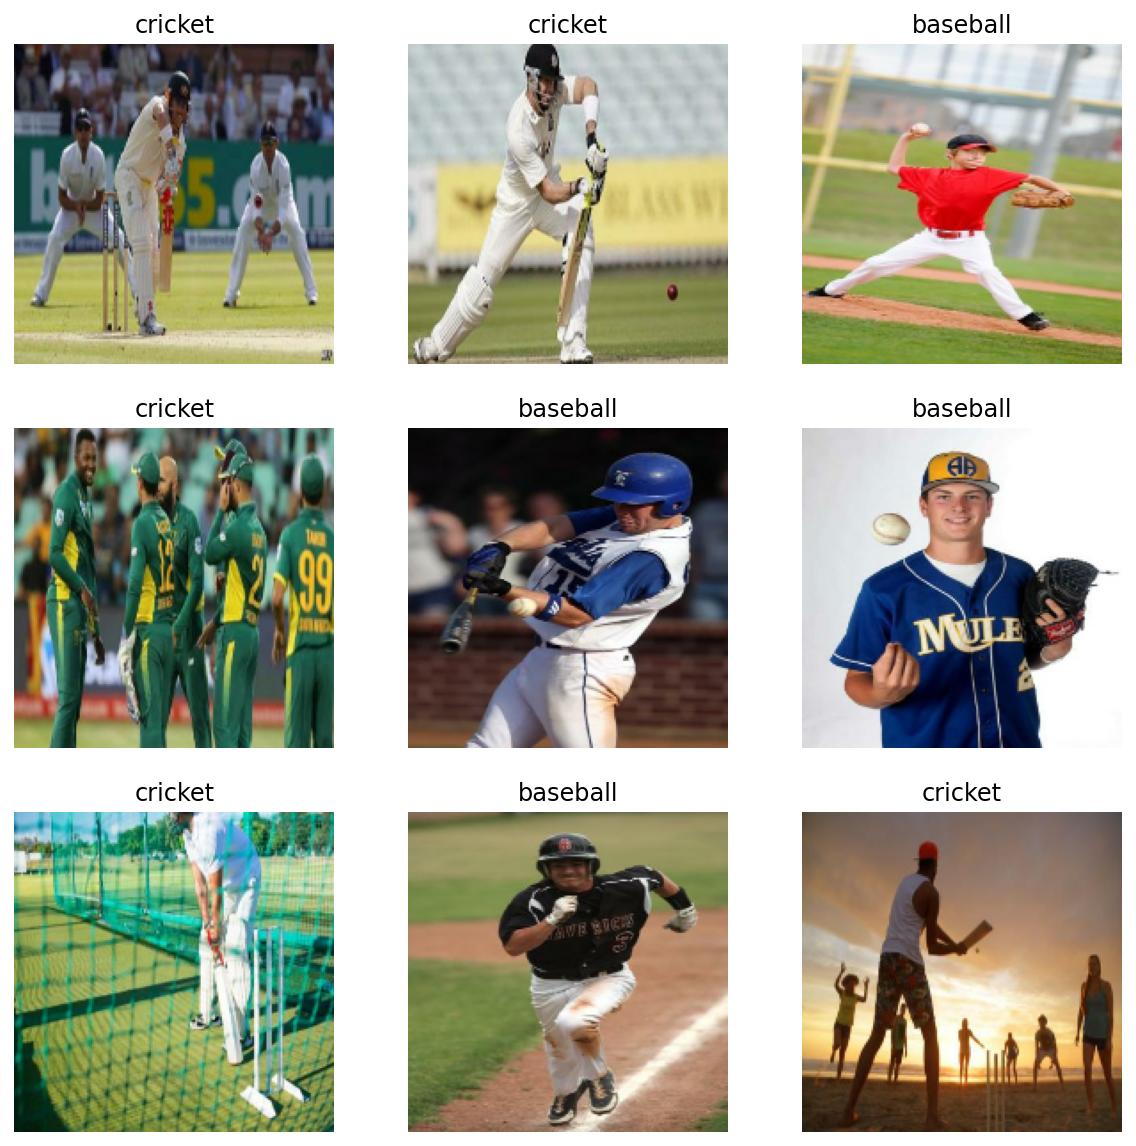

In [92]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [93]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [19]:
AUTOTUNE = tf.data.AUTOTUNE #to improve performance working with GPU/TPU

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
num_classes = 3

model2_simple = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

In [21]:
model2_simple.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [22]:
epochs=15

history = model2_simple.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15


c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 15s 2s/step - loss: 1.3064 - accuracy: 0.3048 - val_loss: 1.0937 - val_accuracy: 0.4146
Epoch 2/15
7/7 [==============================] - 11s 2s/step - loss: 1.0652 - accuracy: 0.4667 - val_loss: 1.0379 - val_accuracy: 0.5122
Epoch 3/15
7/7 [==============================] - 12s 2s/step - loss: 1.0087 - accuracy: 0.5476 - val_loss: 1.0555 - val_accuracy: 0.4878
Epoch 4/15
7/7 [==============================] - 12s 2s/step - loss: 0.9695 - accuracy: 0.4619 - val_loss: 0.9894 - val_accuracy: 0.5366
Epoch 5/15
7/7 [==============================] - 12s 2s/step - loss: 0.8592 - accuracy: 0.6190 - val_loss: 1.0067 - val_accuracy: 0.5610
Epoch 6/15
7/7 [==============================] - 12s 2s/step - loss: 0.7358 - accuracy: 0.6333 - val_loss: 1.0561 - val_accuracy: 0.5366
Epoch 7/15
7/7 [==============================] - 13s 2s/step - loss: 0.6251 - accuracy: 0.7048 - val_loss: 1.1606 - val_accuracy: 0.6585
Epoch 8/15
7/7 [=============================

## Adding augmented

In [29]:
num_classes = 3


data_augmentation = keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)


model2_augmented = tf.keras.Sequential([
  data_augmentation,  
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

In [31]:
model2_augmented.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [32]:
epochs=15

history_aug = model2_augmented.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/15


c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 16s 2s/step - loss: 1.6079 - accuracy: 0.3524 - val_loss: 1.1361 - val_accuracy: 0.3171
Epoch 2/15
7/7 [==============================] - 15s 2s/step - loss: 1.1012 - accuracy: 0.3524 - val_loss: 1.0754 - val_accuracy: 0.3659
Epoch 3/15
7/7 [==============================] - 16s 2s/step - loss: 1.0908 - accuracy: 0.3381 - val_loss: 1.0515 - val_accuracy: 0.5122
Epoch 4/15
7/7 [==============================] - 17s 2s/step - loss: 1.0404 - accuracy: 0.4952 - val_loss: 1.0290 - val_accuracy: 0.4146
Epoch 5/15
7/7 [==============================] - 16s 2s/step - loss: 1.0149 - accuracy: 0.4667 - val_loss: 1.0039 - val_accuracy: 0.4878
Epoch 6/15
7/7 [==============================] - 14s 2s/step - loss: 0.9770 - accuracy: 0.5143 - val_loss: 0.9840 - val_accuracy: 0.6098
Epoch 7/15
7/7 [==============================] - 14s 2s/step - loss: 0.8548 - accuracy: 0.5952 - val_loss: 0.9724 - val_accuracy: 0.6098
Epoch 8/15
7/7 [=============================

## End Adding AUgmented

In [ ]:
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(224 ,224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(224 ,224),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42

In [76]:
def plot_accur_loss (history, epochs=3):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8,8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

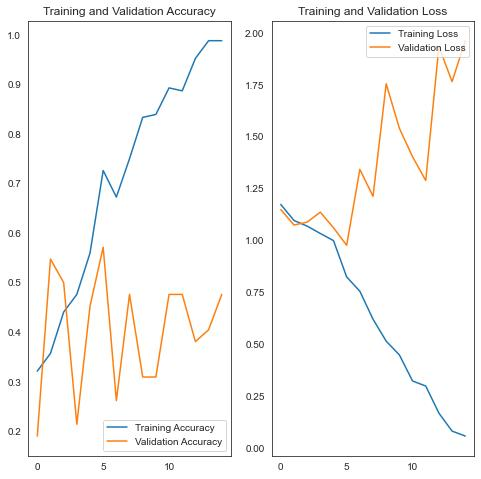

In [101]:
plot_accur_loss (history, epochs)

### with data augmentation

In [78]:
img_height = 180
img_width = 180


data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [79]:
num_classes = 3

model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [127]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [128]:
epochs = 15
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
6/6 [==============================] - 11s 1s/step - loss: 0.9250 - accuracy: 0.6012 - custom_f1: 0.9752 - val_loss: 1.3789 - val_accuracy: 0.3810 - val_custom_f1: 1.1300
Epoch 2/15
6/6 [==============================] - 8s 1s/step - loss: 0.7781 - accuracy: 0.6548 - custom_f1: 0.9458 - val_loss: 0.8908 - val_accuracy: 0.5476 - val_custom_f1: 1.0833
Epoch 3/15
6/6 [==============================] - 7s 1s/step - loss: 0.7145 - accuracy: 0.6964 - custom_f1: 0.9904 - val_loss: 1.0182 - val_accuracy: 0.5714 - val_custom_f1: 1.2214
Epoch 4/15
6/6 [==============================] - 7s 1s/step - loss: 0.6900 - accuracy: 0.6964 - custom_f1: 1.0155 - val_loss: 1.1720 - val_accuracy: 0.5476 - val_custom_f1: 1.1616
Epoch 5/15
6/6 [==============================] - 8s 1s/step - loss: 0.6498 - accuracy: 0.7440 - custom_f1: 1.0293 - val_loss: 1.2639 - val_accuracy: 0.5238 - val_custom_f1: 1.2044
Epoch 6/15
6/6 [==============================] - 7s 1s/step - loss: 0.5755 - accuracy: 0.7798

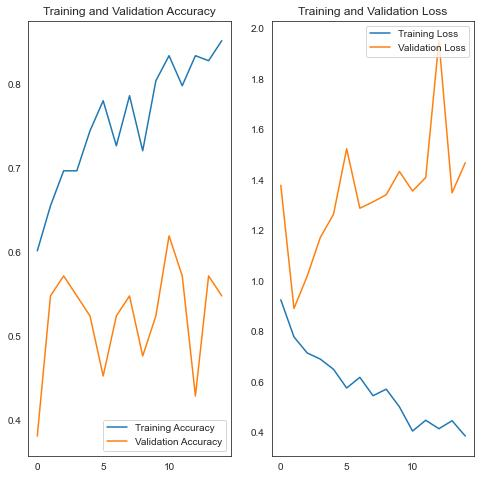

In [129]:
plot_accur_loss (history2, epochs)

In [ ]:
### adding base model (not working)

In [133]:
num_classes = 3
base_model=tf.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=(180,180,3), pooling='max') 

model3 = Sequential([
  #data_augmentation,
  base_model,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

ValueError: Input 0 of layer "conv2d_55" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1536)

In [ ]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [141]:

# Note you are always told NOT to make the base model trainable initially- that is WRONG you get better results leaving it trainable
base_model.trainable=True
x=base_model.output
x=BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)
x=Dropout(rate=.4, seed=123)(x)       
output=Dense(3, activation='softmax')(x)
model=Model(inputs=base_model.input, outputs=output)
lr=.001 # start with this learning rate
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy']) 

In [144]:
# Load in EfficientNetB3
effnet = EfficientNetB3(weights=None,
                        include_top=False,
                        input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS))

effnet.load_weights('../input/efficientnet-keras-weights-b0b5/efficientnet-b3_imagenet_1000_notop.h5')


NameError: name 'EfficientNetB3' is not defined

In [143]:
history_pretrained=model.fit(x=train_ds,  epochs=epochs, verbose=1,  validation_data=val_ds, # callbacks=callbacks, 
               validation_steps=None,  shuffle=False,  initial_epoch=0)




Epoch 1/15


ValueError: in user code:

    File "c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\march\anaconda3\envs\NeuronalNetwork\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


### different way with data augmentation

In [146]:
# https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

def build_model(num_classes):
    inputs = layers.Input(shape=(224, 224, 3))
    x = img_augmentation(inputs)
    model = EfficientNetB0(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )
    return model

In [102]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [103]:
src_path_train = r"C:\Users\march\000 Treball Ju`yter 000\Hackathons\Image_sports_classification\Imágenes-data-science-ii\train"
src_path_test = r"C:\Users\march\000 Treball Ju`yter 000\Hackathons\Image_sports_classification\Imágenes-data-science-ii\test"


batch_size = 60
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(180 ,180),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(180 ,180),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)
test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(180 ,180),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 169 images belonging to 3 classes.
Found 41 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [45]:
from keras import backend as K

def triplet_loss(y_true, y_pred, alpha = 0.4):
    """
    Implementation of the triplet loss function
    Arguments:
    y_true -- true labels, required when you define a loss in Keras, you don't need it in this function.
    y_pred -- python list containing three objects:
            anchor -- the encodings for the anchor data
            positive -- the encodings for the positive data (similar to anchor)
            negative -- the encodings for the negative data (different from anchor)
    Returns:
    loss -- real number, value of the loss
    """

    anchor = y_pred[:,0:3]
    positive = y_pred[:,3:6]
    negative = y_pred[:,6:9]

    # distance between the anchor and the positive
    pos_dist = K.sum(K.square(anchor-positive),axis=1)

    # distance between the anchor and the negative
    neg_dist = K.sum(K.square(anchor-negative),axis=1)

    # compute loss
    basic_loss = pos_dist-neg_dist+alpha
    loss = K.maximum(basic_loss,0.0)
 
    return loss

#### costum f1

In [104]:
def custom_f1(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [121]:
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)

def prepare_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(180, 180, 3)))
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(32, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile( loss='categorical_crossentropy',
                    metrics=['accuracy'],# custom_f1],
                    optimizer='adam') #instead of 'adam' optimizer
    return model

In [122]:
model = prepare_model()
history_aug =model.fit_generator(train_generator,
            validation_data = train_generator,
            steps_per_epoch = train_generator.n//train_generator.batch_size,
            validation_steps = valid_generator.n//valid_generator.batch_size,
            epochs=15)

Epoch 1/15
2/2 [==============================] - 6s 3s/step - loss: 1.2933 - accuracy: 0.3028
Epoch 2/15
2/2 [==============================] - 4s 2s/step - loss: 2.2434 - accuracy: 0.3211
Epoch 3/15
2/2 [==============================] - 3s 1s/step - loss: 1.3363 - accuracy: 0.3211
Epoch 4/15
2/2 [==============================] - 4s 2s/step - loss: 1.0985 - accuracy: 0.3670
Epoch 5/15
2/2 [==============================] - 4s 2s/step - loss: 1.0983 - accuracy: 0.3853
Epoch 6/15
2/2 [==============================] - 4s 1s/step - loss: 1.1006 - accuracy: 0.3486
Epoch 7/15
2/2 [==============================] - 4s 2s/step - loss: 1.0983 - accuracy: 0.3917
Epoch 8/15
2/2 [==============================] - 3s 2s/step - loss: 1.0976 - accuracy: 0.4128
Epoch 9/15
2/2 [==============================] - 3s 1s/step - loss: 1.0978 - accuracy: 0.3761
Epoch 10/15
2/2 [==============================] - 4s 2s/step - loss: 1.0972 - accuracy: 0.3945
Epoch 11/15
2/2 [==============================] 

In [ ]:
https://www.kaggle.com/code/gpiosenka/sports-using-csv-file-f1-score-96-7

In [114]:
plot_accur_loss (history_aug, 15)

KeyError: 'val_accuracy'

### Fem proves amb normalització per batch vs dropout (copiat no funciona)

Fem proves amb normalització per batch vs dropout:

Source: 
* https://github.com/skirenekim/Demystify_NeuralNets/blob/main/BatchNormalization_vs_Dropout/Batch_Normalization_vs_Dropout.ipynb
* https://medium.com/mlearning-ai/demystifying-batch-normalization-vs-drop-out-1c8310d9b516



In [123]:
# VGG2 with Batch Normalization with SGD
def CNN():
    input_layer = keras.Input(shape=(180,180,3))
    x = keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(input_layer)
    x = keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    output_layer = keras.layers.Dense(3, activation='softmax')(x)
    model = keras.Model(inputs=input_layer, outputs=output_layer, name = 'CNN')
    model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(learning_rate=0.001),  metrics=['acc', 'AUC'])
    return model 

# more Batch Normalization layers with SGD
def CNN_more_BN():
    input_layer = keras.Input(shape=(180,180,3))
    x = keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(input_layer)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    output_layer = keras.layers.Dense(3, activation='softmax')(x)
    model = keras.Model(inputs=input_layer, outputs=output_layer, name = 'CNN')
    model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.SGD(learning_rate=0.001),  metrics=['acc', 'AUC'])
    return model 

# Batch Normalization with Adam 
def CNN_adam():
    input_layer = keras.Input(shape=(180,180,3))
    x = keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(input_layer)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.BatchNormalization()(x)
    output_layer = keras.layers.Dense(3, activation='softmax')(x)
    model = keras.Model(inputs=input_layer, outputs=output_layer, name = 'CNN')
    model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=0.001),  metrics=['acc', 'AUC'])
    return model 


# VGG2 with Dropout
def CNN_Drop():
    input_layer = keras.Input(shape=(180,180,3))
    x = keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(input_layer)
    x = keras.layers.Conv2D(32, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.Conv2D(64, (3,3), padding='same', activation = 'relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.MaxPooling2D((2, 2))(x)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu', kernel_initializer = keras.initializers.HeUniform(seed=1))(x)
    x = keras.layers.Dropout(0.2)(x)
    output_layer = keras.layers.Dense(3, activation='softmax')(x)
    model = keras.Model(inputs=input_layer, outputs=output_layer, name = 'CNN')
    model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.Adam(learning_rate=0.001),  metrics=['acc', 'AUC'])
    return model

In [7]:
model_initial = CNN()
model_Batch_Normalization = CNN_more_BN() #
model_3 = CNN_adam()
model_Drop = CNN_Drop()

In [13]:
my_callbacks = [
    EarlyStopping(patience=15),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience= 3, cooldown = 2, mode="min", min_lr=0.0001, verbose =1),
    #ModelCheckpoint(monitor="val_loss", save_best_only = True, filepath = model_path),
    TensorBoard(log_dir='C:/Users/march/000 Treball Ju`yter 000/Hackathons/Image_sports_classification/logs')
    ]

In [14]:

history_B1 = model.fit(X_train, y_train,  batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks = my_callbacks)

NameError: name 'X_train' is not defined

# Salvar el modelo y los pesos

In [24]:
from keras.models import model_from_json
from time import localtime, strftime, gmtime

# SAVE
# to serialize the modelo to JSON (model = trained and compiled model)
def save_model (model, name_model):
    ''' Function to save trained neuronal network with wheghts:
            INPUT: model and model name as string
            OUTPUT: after saving two files in the working directory it prints an success message. 
            '''

    time = strftime("%Y_%m_%d_%H:%M", localtime())
    model_name = name_model + time
    model_name_json = model_name + '.json'
    model_name_h5 = model_name + '.h5'
    model_json = model.to_json()
    with open(model_name_json, "w") as json_file:
        json_file.write(model_json)
    #to serialize the weights for HDF5
    model.save_weights(model_name_h5)
    print("Model saved. Date: ", time )


# LOAD / RECOVER
# to load the json file and load the model with weights

def load_model_and_weights(model_name):
    ''' Function to load saved models of neuronal network with wheghts (files should be in the working directori)
            INPUT: model name as string
            OUTPUT: return the model with the weights and print message if all is all right or something when wrong. 
            '''
    file_json = model_name+ '.json'
    file_h5 = model_name+ '.h5'
    try:
        json_file = open('model.json', 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        loaded_model = model_from_json(loaded_model_json) # se cargan los pesos (weights) en el nuevo modelo
        loaded_model.load_weights("model.h5") # se cargan los pesos (weights) en el nuevo modelo
        print("Modelo cargado desde el PC") 
        return loaded_model
    except FileNotFoundError: 
        print (f'It was no possible to charge this model, please check the name and route of files: \n{model_name}.json \n{model_name}.h5')
    


In [25]:
load_model_and_weights('model_g')


It was no possible to charge this model, please check the name and route of files: 
model_g.json 
model_g.h5


In [ ]:

# se evalua el modelo cargado con los datos de los test
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

# Predicitons

To perform predictions testing images are also converted to the jpg format and resized properly

In [ ]:
# convert images from test directory to jpg
to_jpg_converter(test_images_dir)